In [25]:
# Install a pip package in the current Jupyter kernel
import sys
sys.path.append('../wdtools')

### General
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from tqdm import tqdm
import pandas as pd

### Query
from astropy.io import fits
import wdtools

In [26]:
wide_binaries = pd.read_csv('data/catalog.csv')

In [27]:
import time

drops = []

flux1 = []
wavelength1 = []
ivar1 = []

flux2 = []
wavelength2 = []
ivar2 = []

for i in tqdm( range(len(wide_binaries))):
    try:
        spec1 = fits.open(wide_binaries['url1'][i], allow_insecure=True)
        spec2 = fits.open(wide_binaries['url2'][i], allow_insecure=True)
        
        flux1.append(spec1[1].data['flux'])
        wavelength1.append(10**spec1[1].data['loglam'])
        ivar1.append(spec1[1].data['ivar'])
        
        flux2.append(spec2[1].data['flux'])
        wavelength2.append(10**spec2[1].data['loglam'])
        ivar2.append(spec2[1].data['ivar'])
        
        time.sleep(2)
    except:
        drops.append(i)
        
wide_binaries = wide_binaries.drop(drops)
wide_binaries.reset_index(inplace=True, drop=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:31<00:00,  2.26s/it]


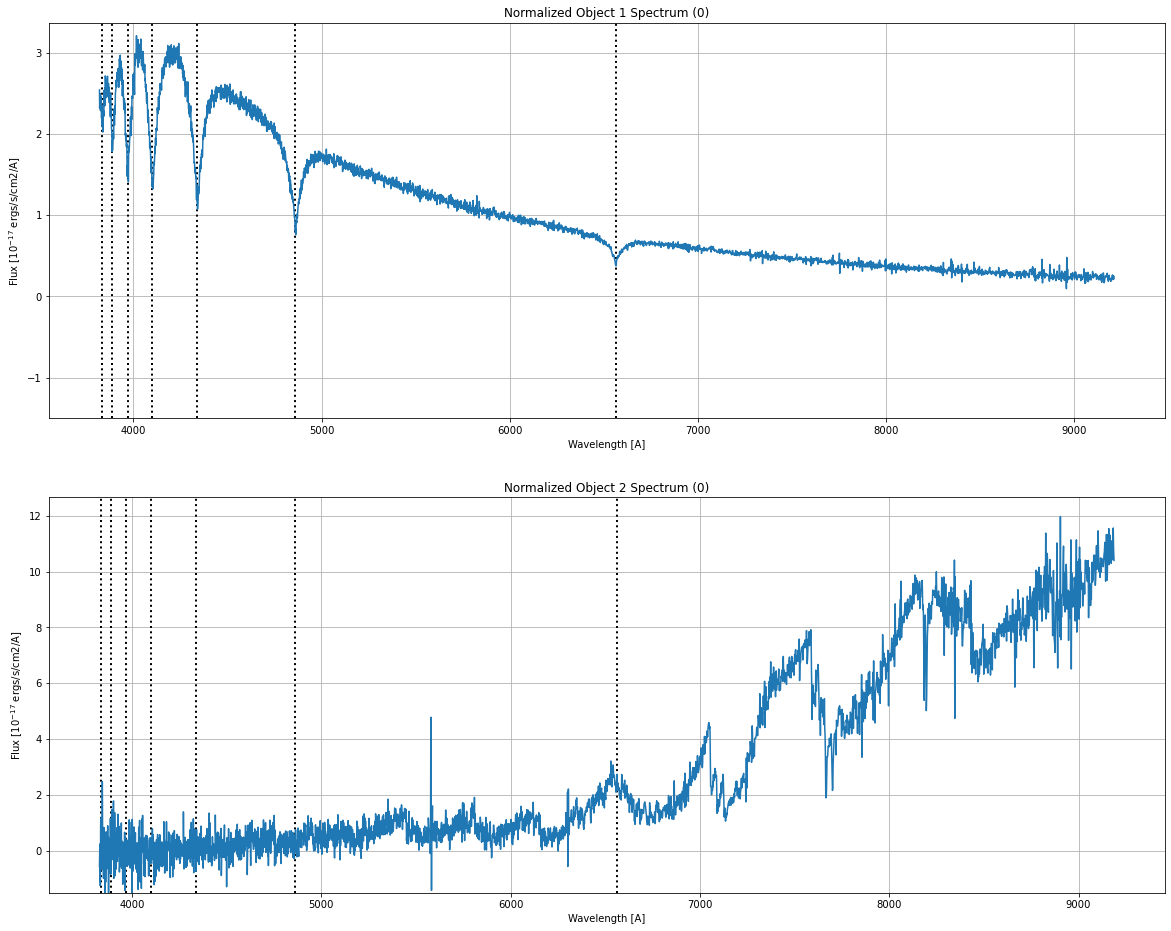

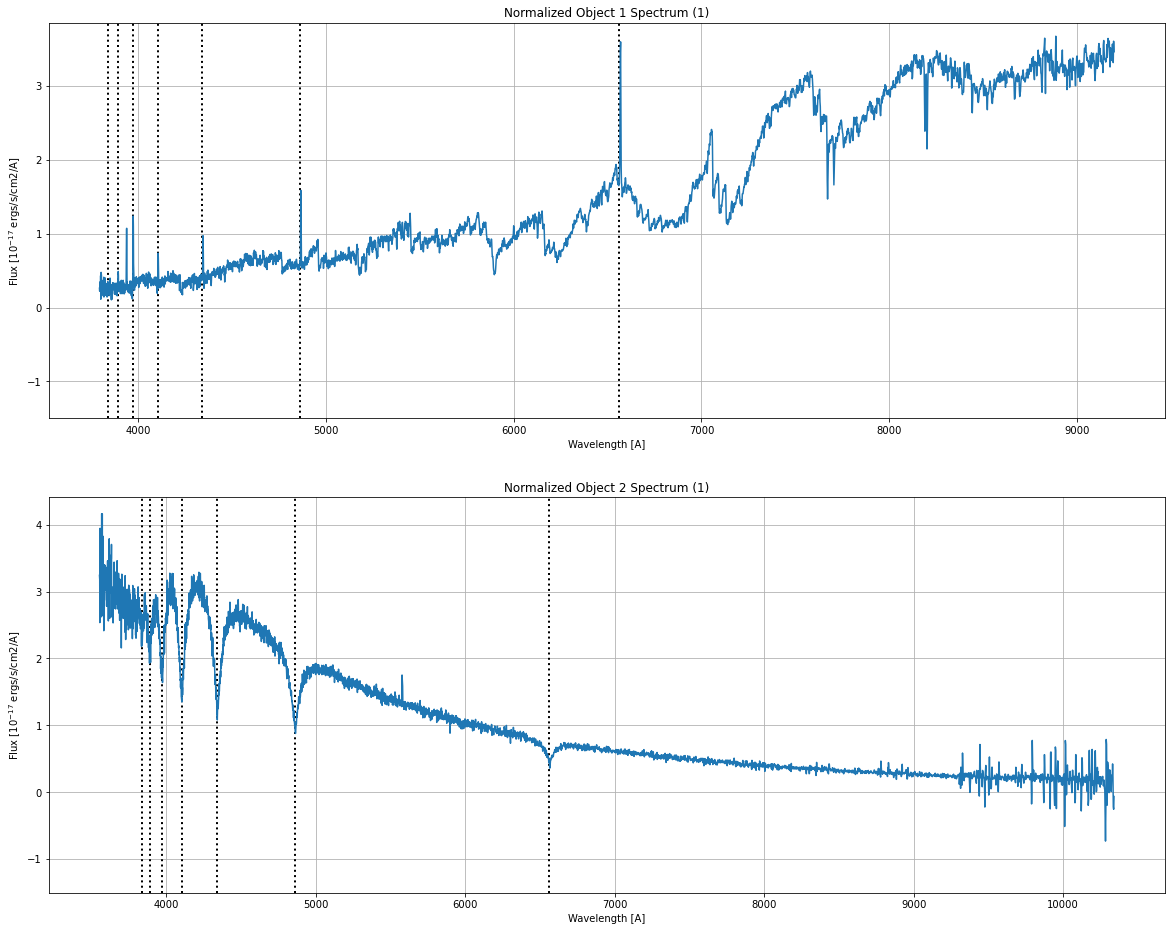

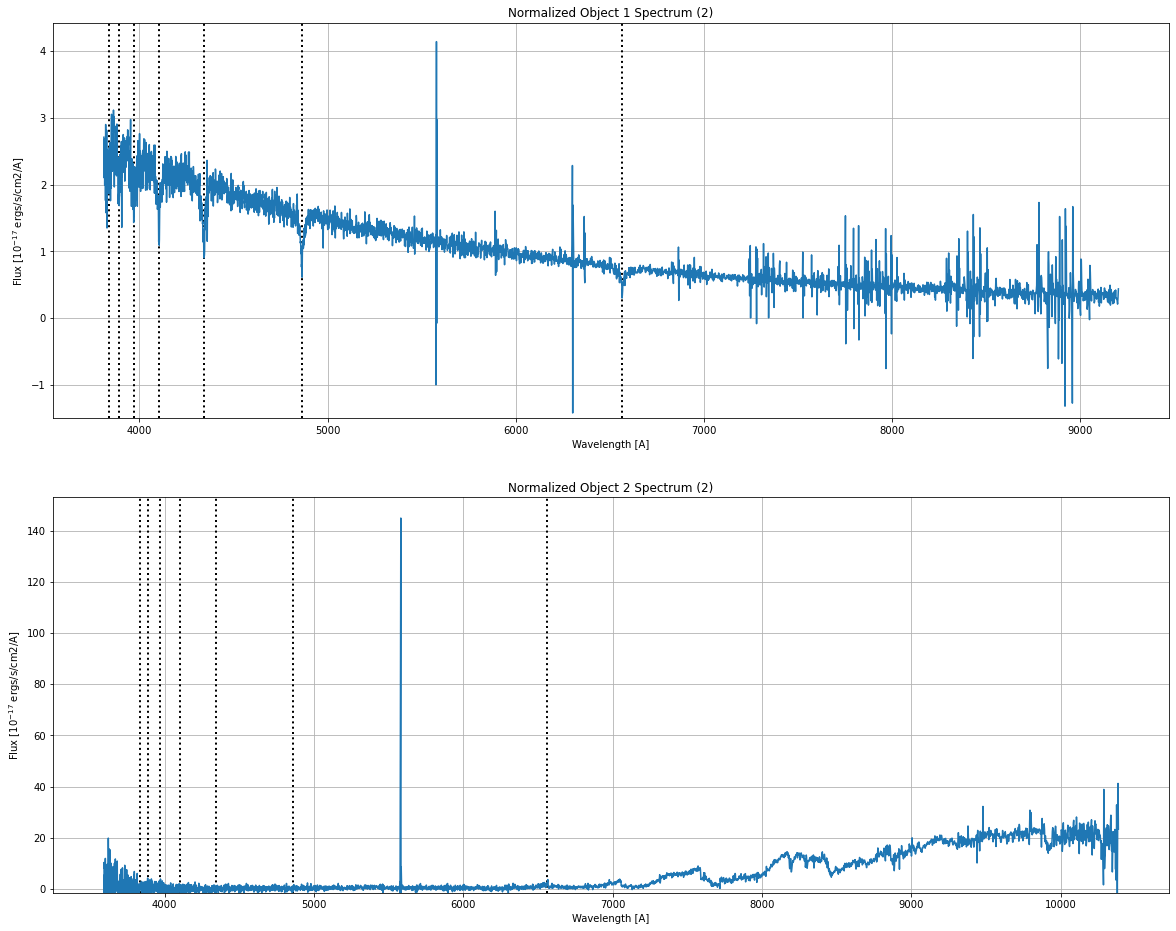

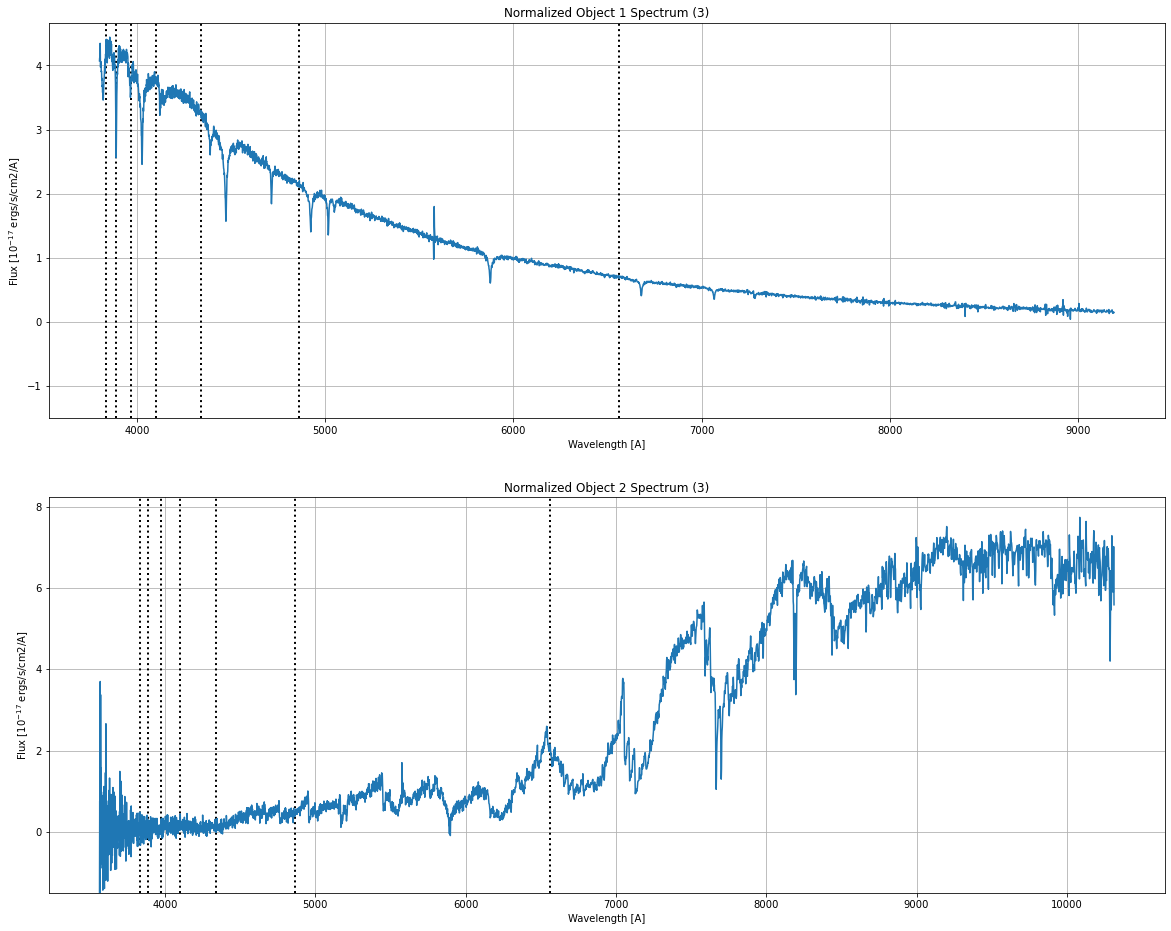

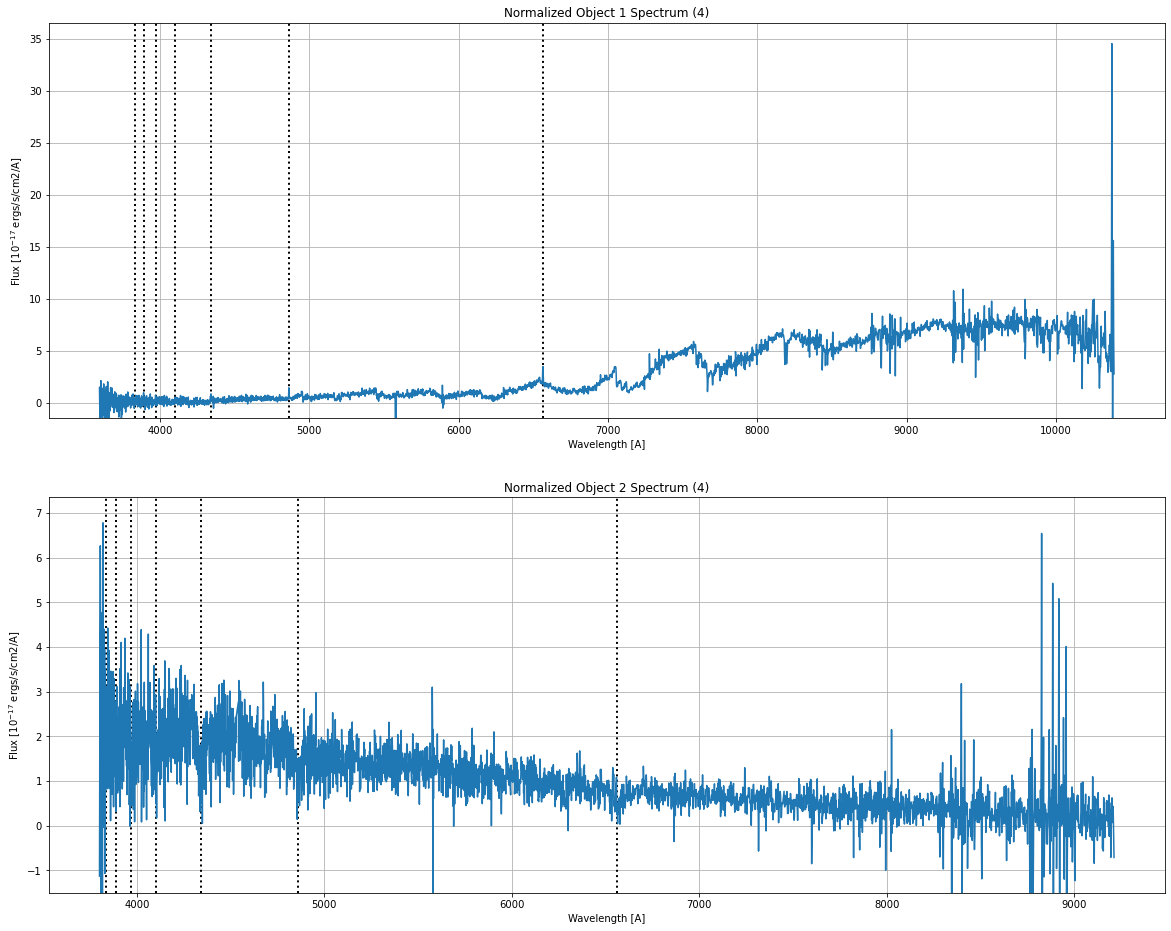

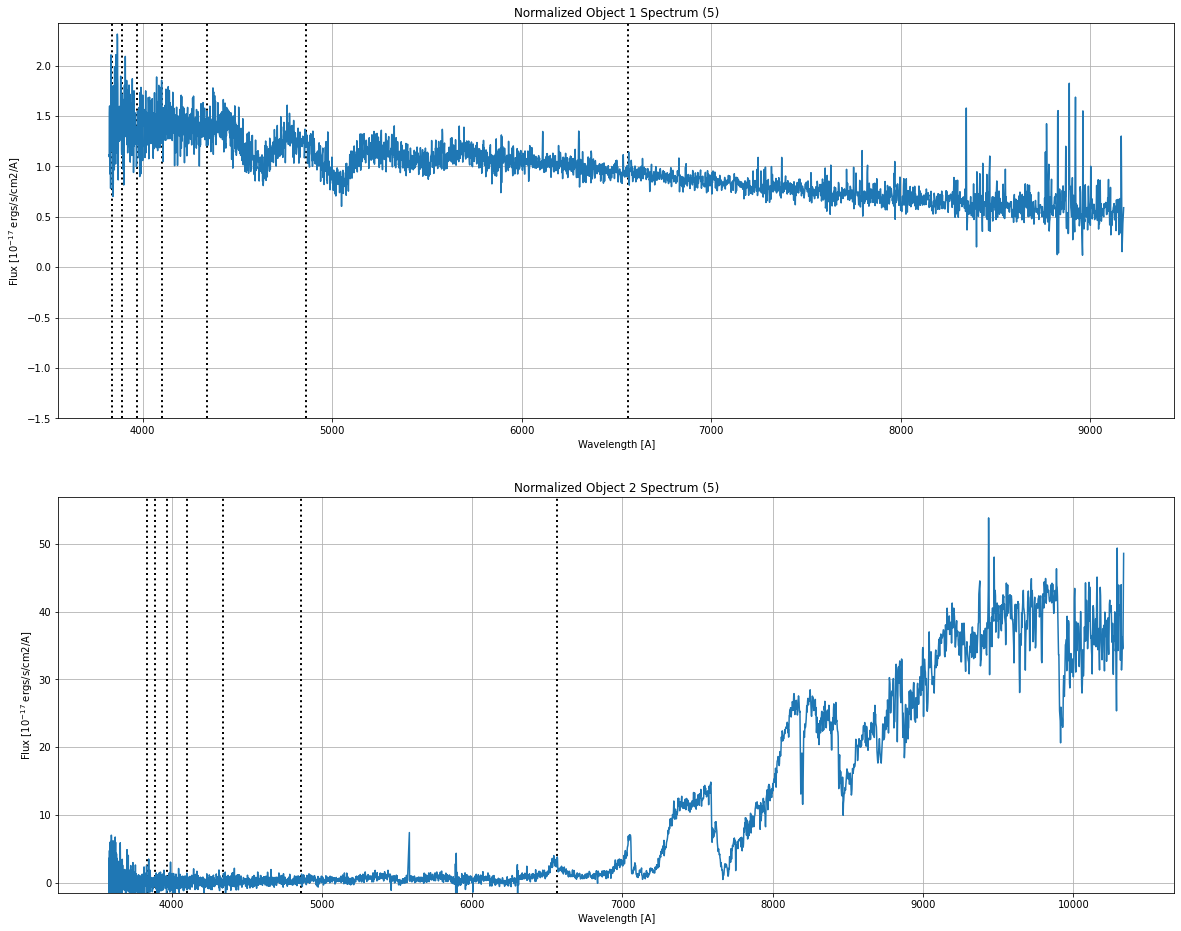

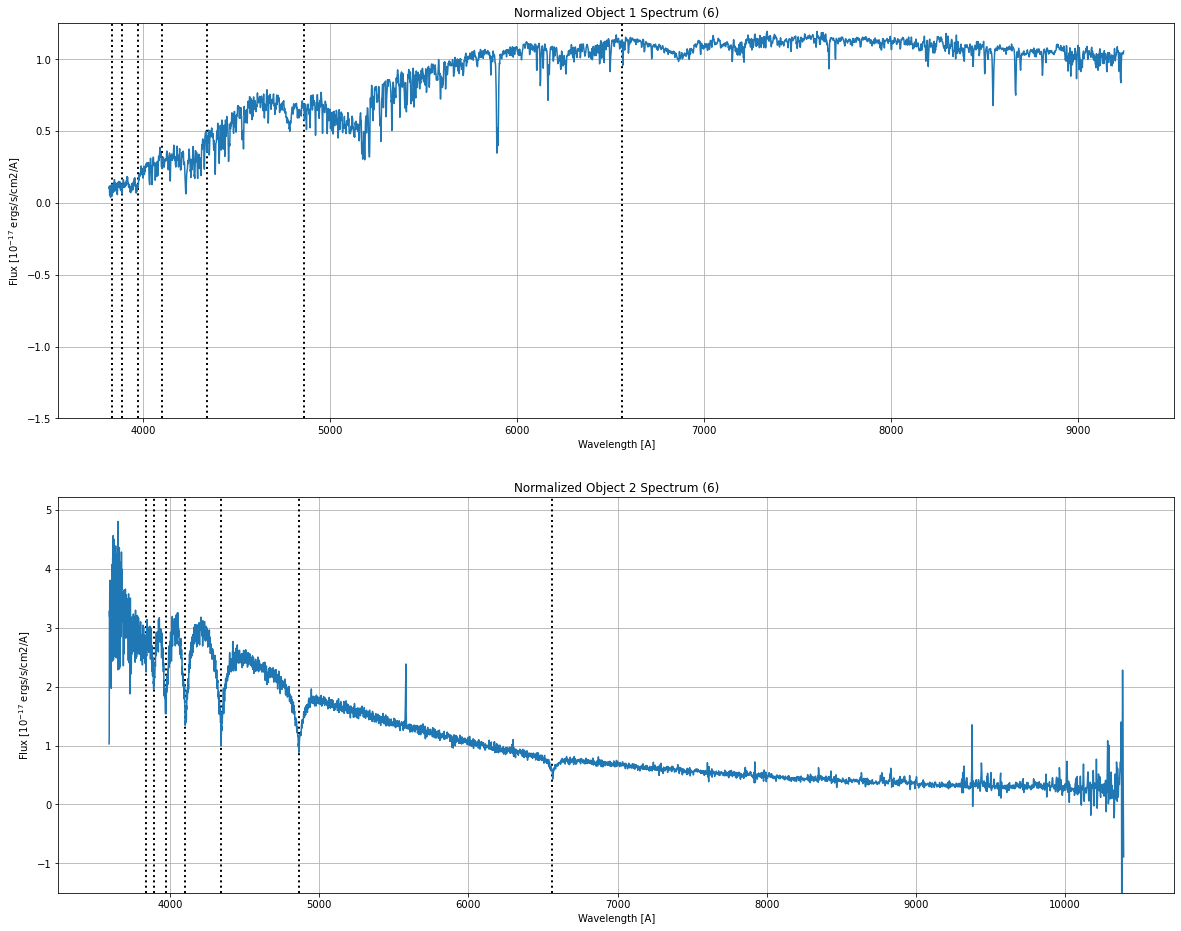

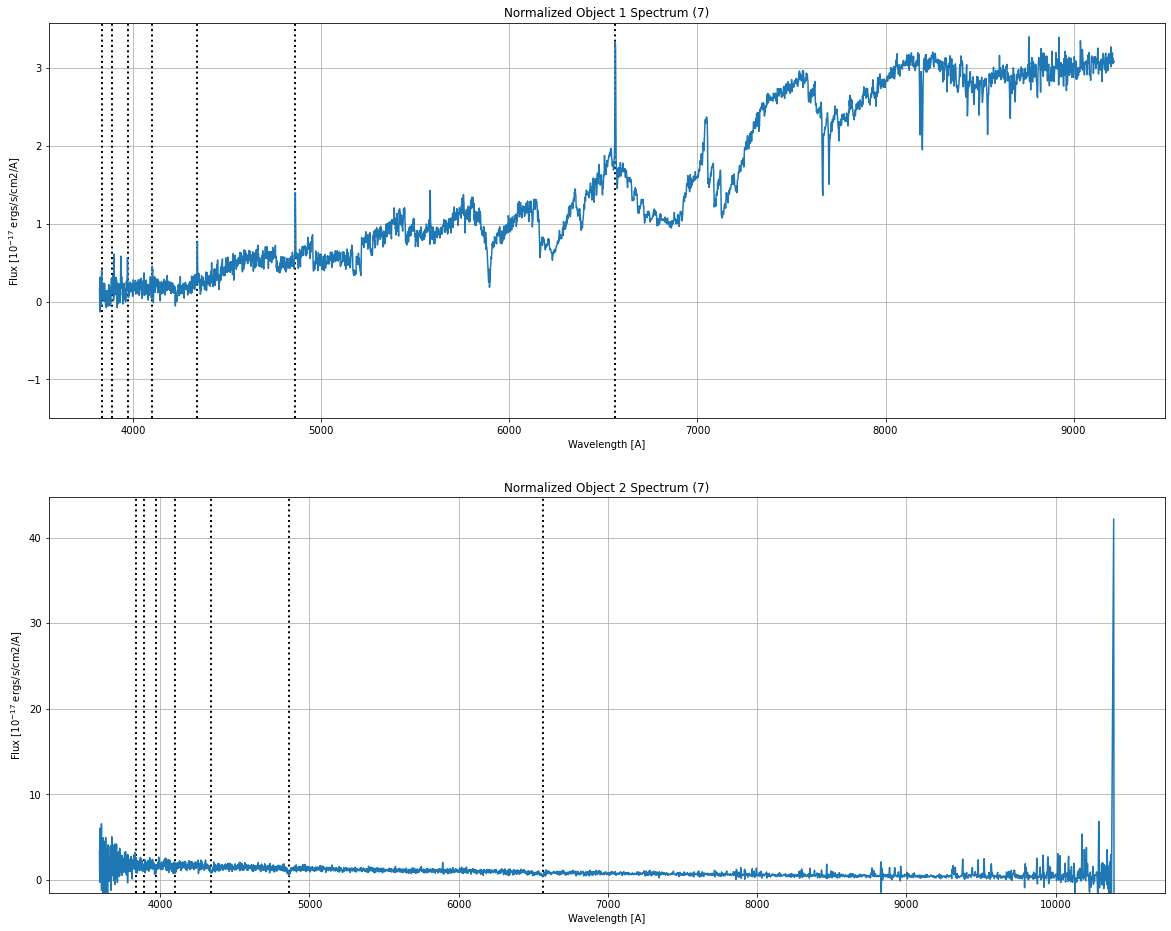

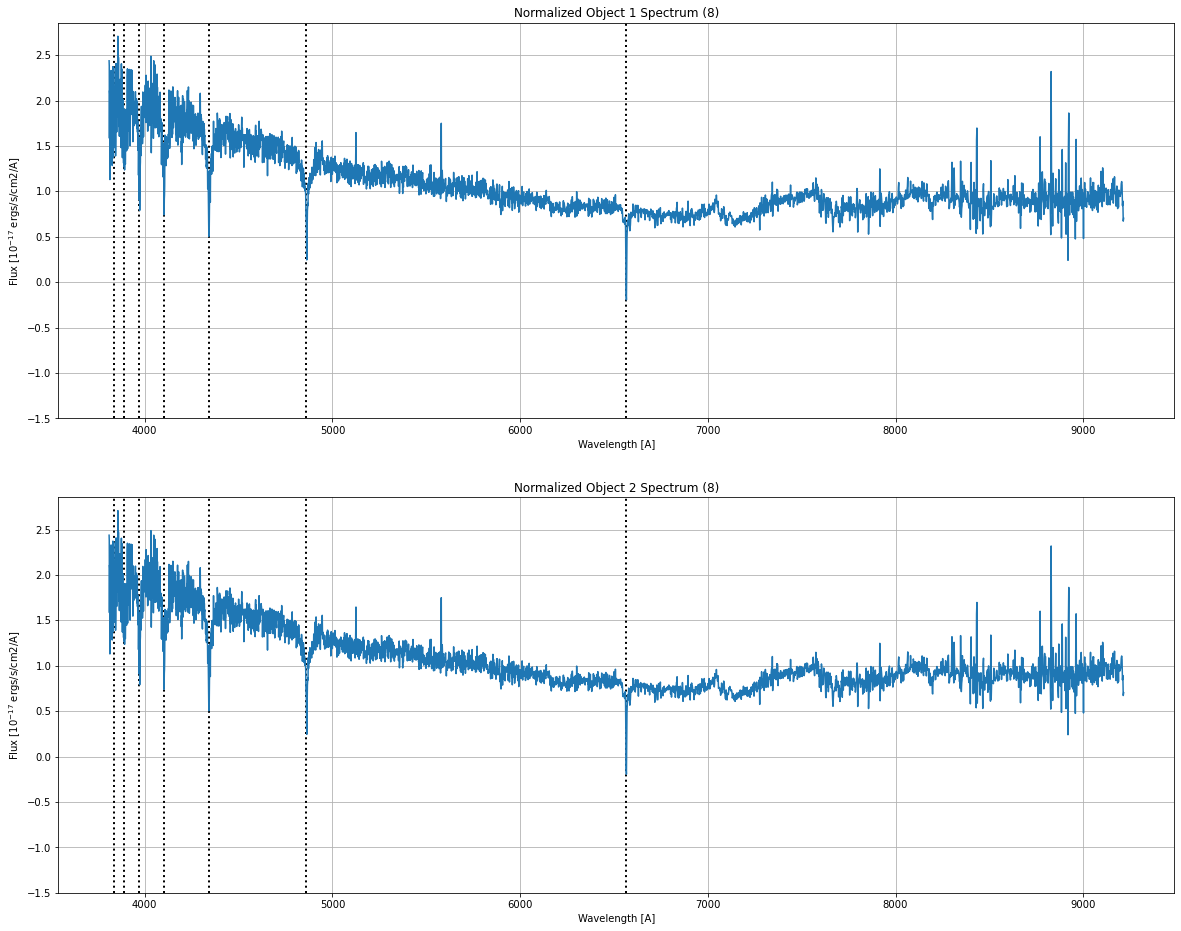

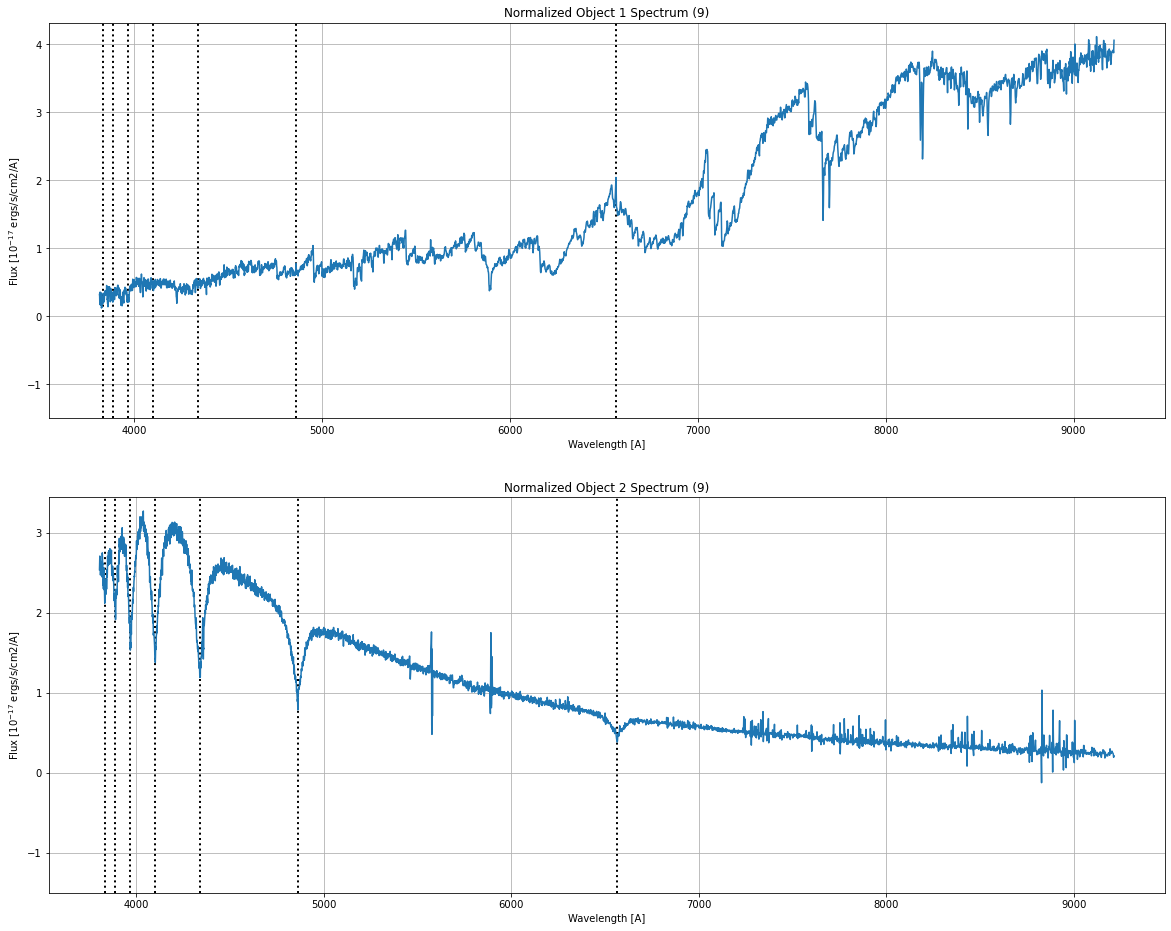

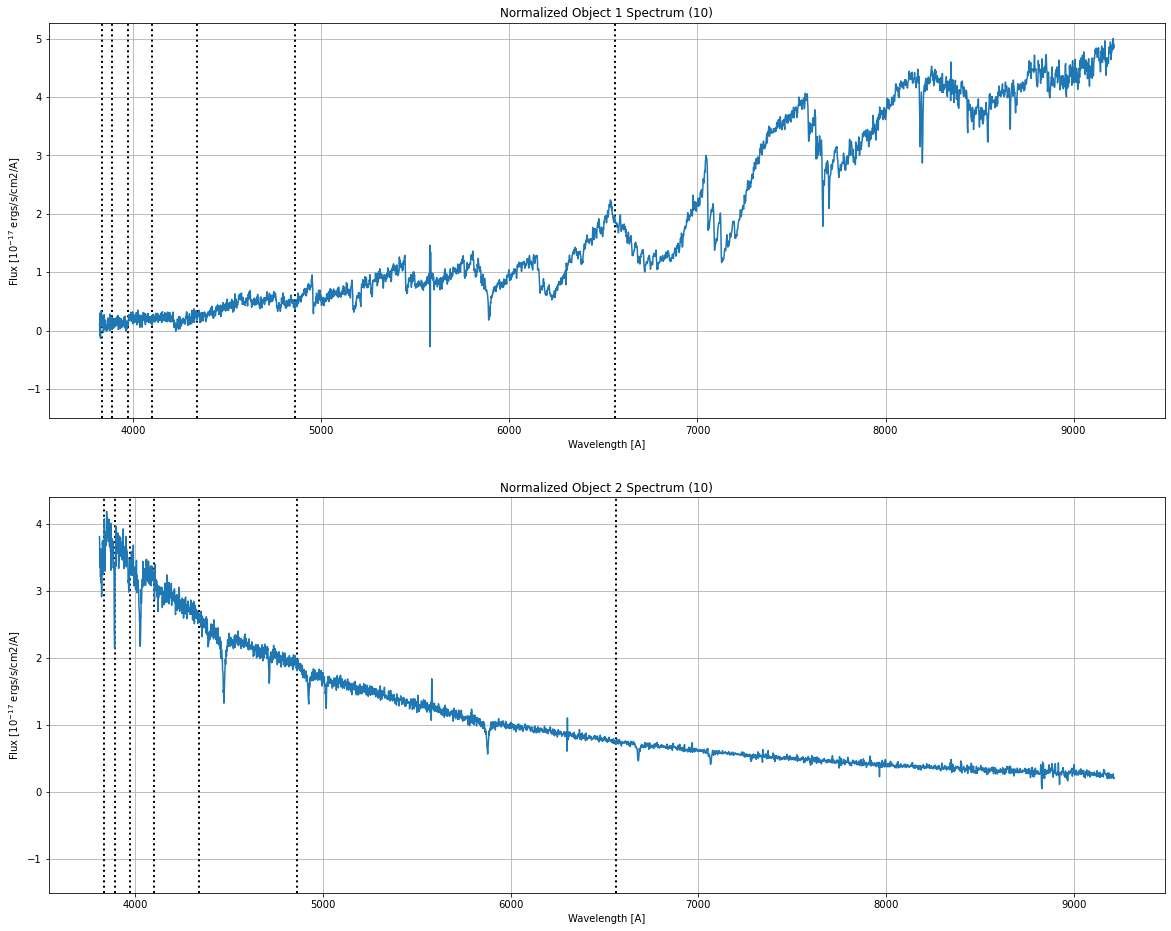

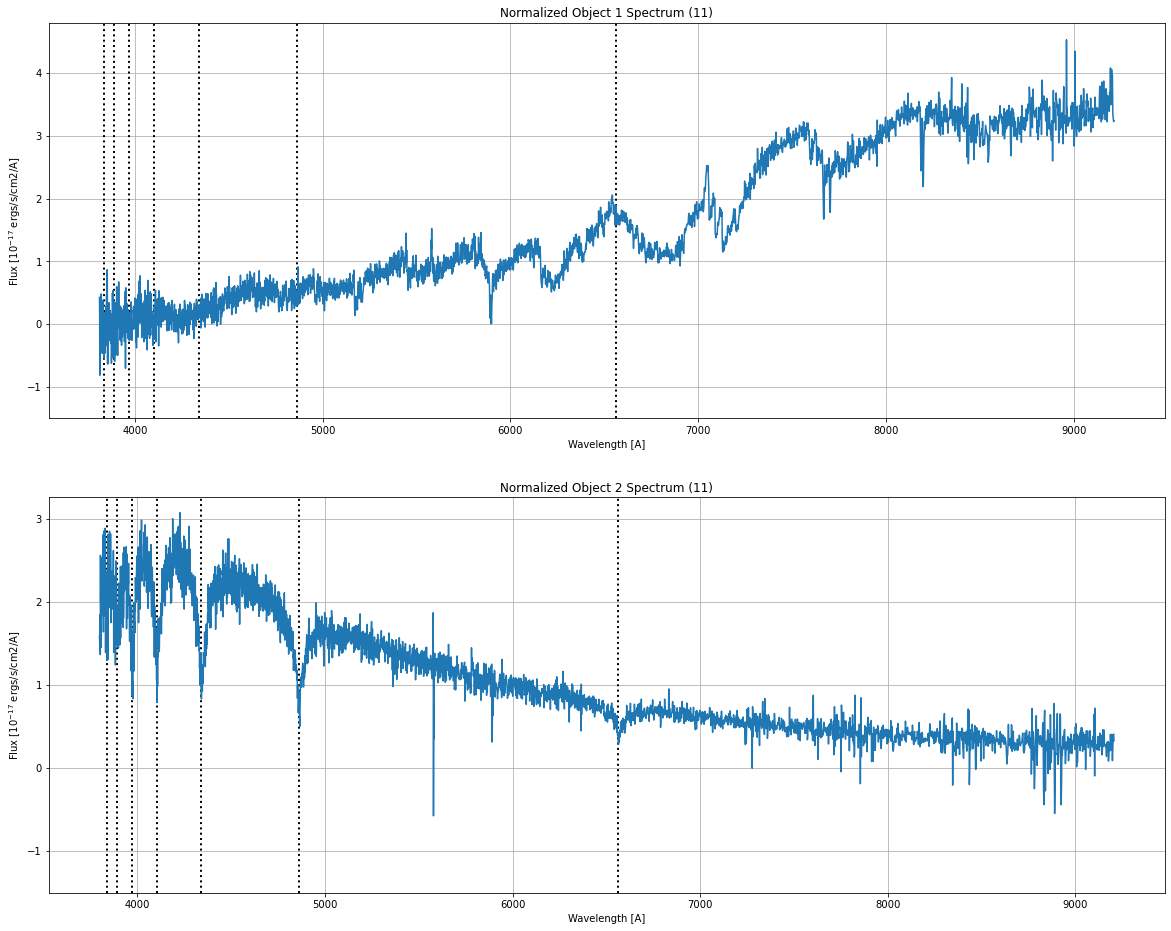

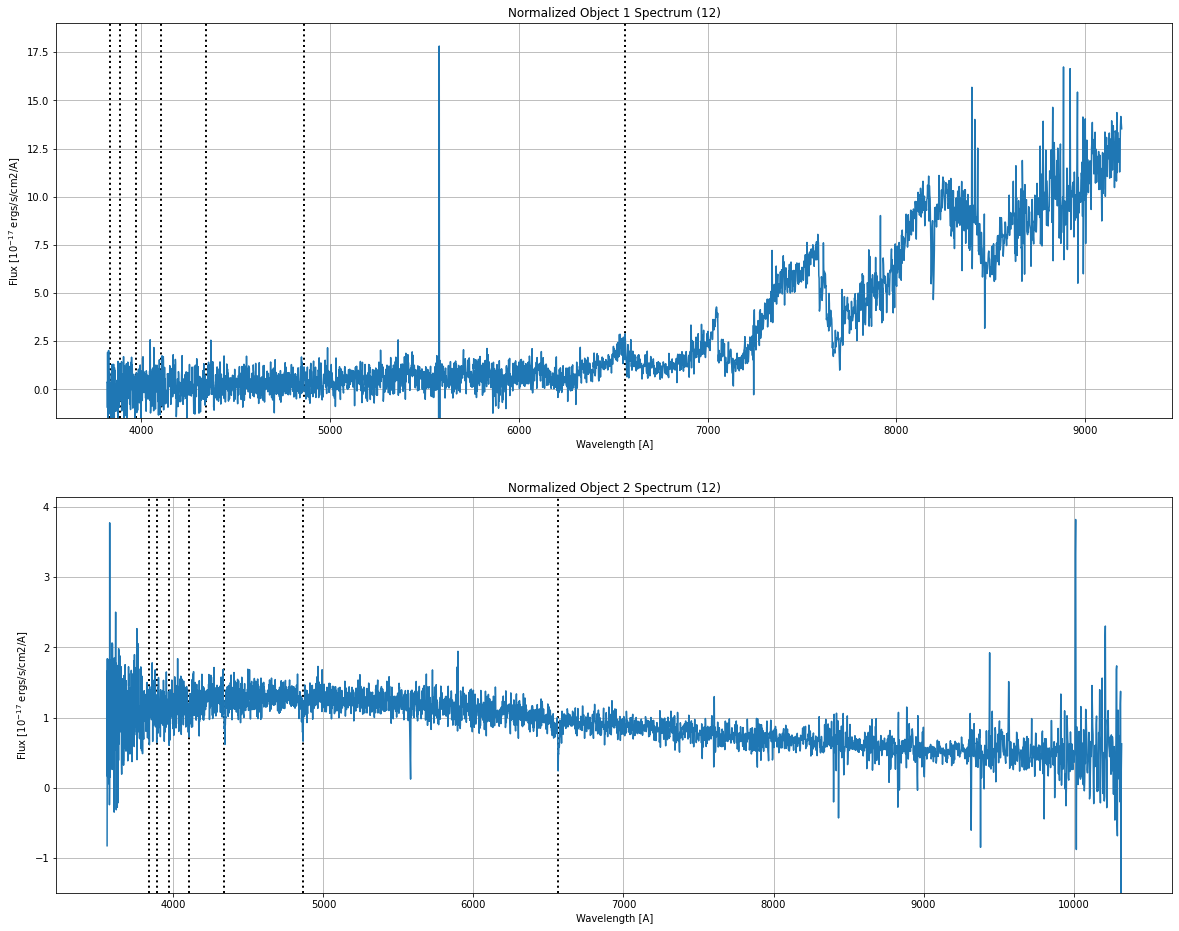

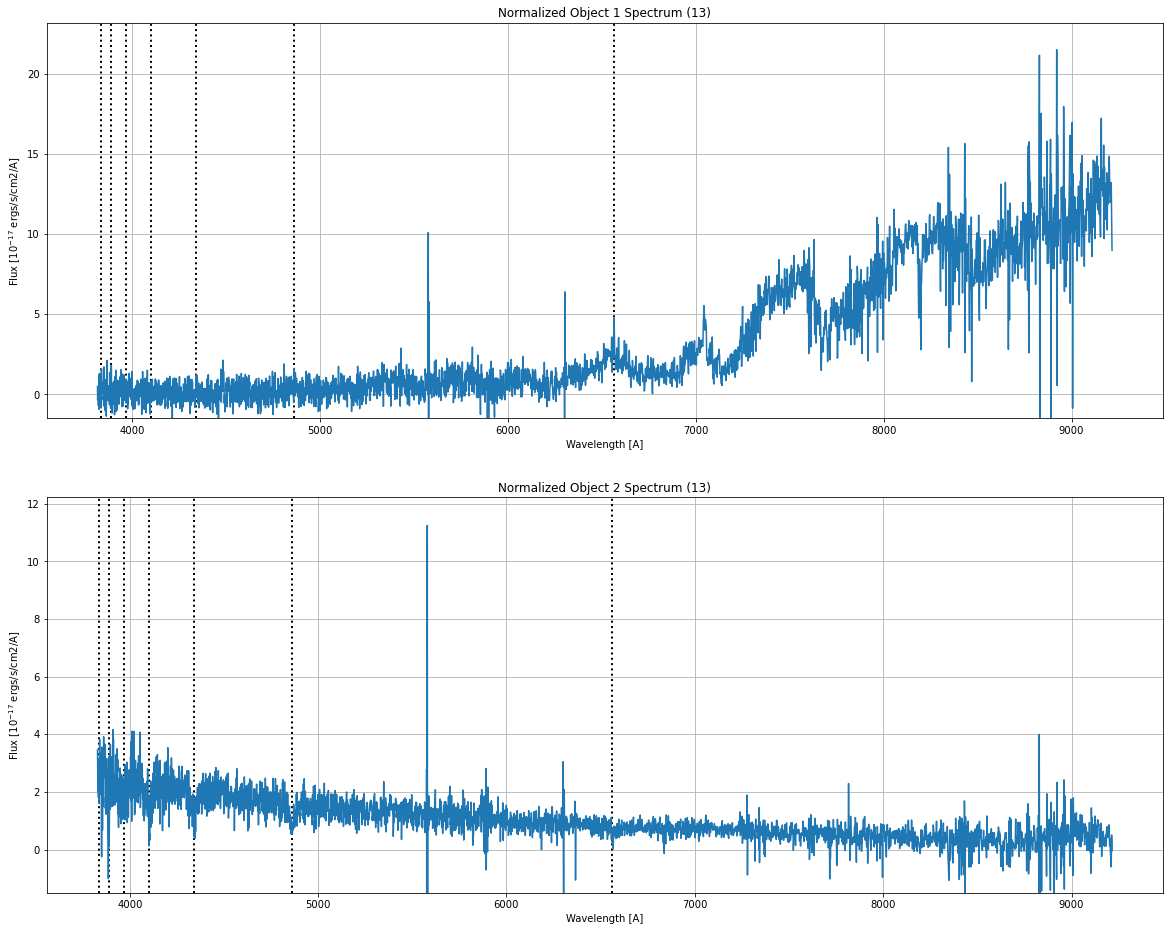

In [28]:
balmer_lines = [6562.79, 4861.35, 4340.47, 4101.73, 3970.07, 3889.06, 3835.40]

for i in range(len(wavelength1)):
    plt.figure(figsize=(20,16))
    
    plt.subplot(211)
    
    plt.plot(wavelength1[i], flux1[i] / np.median(flux1[i]))
    plt.ylim(bottom = -1.5)
    #plt.xlim(3500, 9000)
    bottom, top = plt.ylim()
    plt.vlines(x=balmer_lines, ymin=bottom, ymax = top, colors='black', ls=':', lw=2, label='vline_single - full height')
    plt.grid()
    plt.ylabel(r'Flux [$10^{-17}$ ergs/s/cm2/A]')
    plt.xlabel(r'Wavelength [A]')
    plt.title('Normalized Object 1 Spectrum ({})'.format(i))
    ax = plt.gca()
    
    plt.subplot(212)
    
    plt.plot(wavelength2[i], flux2[i] / np.median(flux2[i]))
    plt.ylim(bottom = -1.5)
    #plt.xlim(3500, 9000)
    bottom, top = plt.ylim()
    plt.vlines(x=balmer_lines, ymin=bottom, ymax = top, colors='black', ls=':', lw=2, label='vline_single - full height')
    plt.grid()
    plt.ylabel(r'Flux [$10^{-17}$ ergs/s/cm2/A]')
    plt.xlabel(r'Wavelength [A]')
    plt.title('Normalized Object 2 Spectrum ({})'.format(i))
    
    ax = plt.gca()
    
    plt.savefig('spectra/binary{}.jpg'.format(i))


In [29]:
rvs1, e_rvs1 = [], []
rvs2, e_rvs2 = [], []

for i in range(len(wavelength1)):
    sp = wdtools.SpecTools()

    h_alpha = 6562.79

    rv1, e_rv1 = sp.get_line_rv(wavelength1[i], flux1[i], ivar1[i], centroid = 4861.35,
                          distance = 100, edge = 15,
                          nmodel = 2, plot = False)
    rv2, e_rv2 = sp.get_line_rv(wavelength2[i], flux2[i], ivar2[i], centroid = 4861.35,
                          distance = 100, edge = 15,
                          nmodel = 2, plot = False)
    
    rvs1.append(rv1)
    e_rvs1.append(e_rv1)
    rvs2.append(rv2)
    e_rvs2.append(e_rv2)

C:\Users\arsen\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]

C:\Users\arsen\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]



In [30]:
rvs = pd.DataFrame({'rv1' : rvs1, 'e_rv1' : e_rvs1, 'rv2' : rvs2, 'e_rv2' : e_rvs2, 'grav_redshift' : np.array(rvs1) - np.array(rvs2)})

In [31]:
print(rvs)

            rv1        e_rv1          rv2       e_rv2  grav_redshift
0     91.919192    16.161616   403.030303  238.020202    -311.111111
1  -1041.414141    67.959596    75.757576   23.393939   -1117.171717
2    120.202020    15.474747 -1100.000000    0.000000    1220.202020
3   1100.000000   210.545455 -1100.000000    0.000000    2200.000000
4   -574.747475   259.151515    53.535354  129.898990    -628.282828
5   1100.000000    90.060606   217.171717  365.898990     882.828283
6   -619.191919    25.252525   112.121212   18.181818    -731.313131
7     23.232323     5.212121    63.636364   57.050505     -40.404040
8     85.858586    13.292929    85.858586   14.141414       0.000000
9     51.515152    57.212121    49.494949   11.272727       2.020202
10   -33.333333   137.858586   966.666667  515.151515   -1000.000000
11 -1100.000000  1100.000000   201.010101   41.898990   -1301.010101
12  -837.373737   435.353535    87.878788   33.494949    -925.252525
13  -805.050505   678.949495     7